# <font style="color:blue">Project 3: Object Detection</font>


#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Plot Ground Truth Bounding Boxes</h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Training</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Inference</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>COCO Detection Evaluation</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Run Inference on a Video</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font style="color:purple">Download the Dataset</font> 

**[Download the Vehicle registration plate](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1)**


Download the Vehicle Registration Plate dataset from [here](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1) and unzip it. 

We will have the following directory structure:

```
Dataset
├── train
│   └── Vehicle registration plate
│       └── Label
└── validation
    └── Vehicle registration plate
        └── Label
```

Unzipping the file will give you a directory `Dataset`. This directory has two folder `train` and `validation`. Each train and validation folder has `Vehicle registration plate`  folder with `.jpg` images and a folder `Labels`.  `Labels` folder has bounding box data for the images.


For example,
For image: `Dataset/train/Vehicle registration plate/bf4689922cdfd532.jpg`
Label file is  `Dataset/train/Vehicle registration plate/Label/bf4689922cdfd532.txt`

There are one or more lines in each `.txt` file. Each line represents one bounding box.
For example,
```
Vehicle registration plate 385.28 445.15 618.24 514.225
Vehicle registration plate 839.68 266.066462 874.24 289.091462
```

We have a single class detection (`Vehicle registration plate detection`) problem. So bounding box details start from the fourth column in each row.

Representation is in `xmin`, `ymin`, `xmax`, and `ymax` format.

**It has `5308` training and `386` validation dataset.**

Data is downloaded from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

### <font color="red">Implementation note<font/>

I have changed the structure of directories to the following:
```
├── images
│   ├── train
│   └── validation
└── labels
    ├── train
    └── validation
```

to use `Ultralytics` library

#  <font style="color:green">1. Plot Ground Truth Bounding Boxes [20 Points]</font> 

**You have to show three images from validation data with the bounding boxes.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g3.png'>



In [1]:
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path


type Rect = tuple[int, int, int, int]


def read_labels(label_path: Path) -> list[Rect]:
    """
    Changes the format from (x_center, y_center, width, height) to (x_min, y_min, x_max, y_max)

    Args:
        label_path (Path): Path to the label file

    Returns:
        list[Rect]: List of rects
    """
    labels = []
    with open(label_path) as f:
        for line in f:
            splited = line.split(" ")
            x_center, y_center, width, height = splited[1:]
            labels.append(
                (
                    float(x_center),
                    float(y_center),
                    float(width),
                    float(height),
                ),
            )

    # Change the format from (x_center, y_center, width, height) to (x_min, y_min, x_max, y_max)
    return [(x1 - w / 2, y1 - h / 2, x1 + w / 2, y1 + h / 2) for x1, y1, w, h in labels]


def show_img(img_path: Path, label_path: Path) -> None:
    """
    Shows the image and the labels

    Args:
        img_path (Path): Path to the image
        label_path (Path): Path to the label file

    Returns:
        None
    """
    img = cv2.imread(str(img_path))
    img_width, img_height = img.shape[1], img.shape[0]
    labels = read_labels(label_path)
    for x1, y1, x2, y2 in labels:
        x1, y1, x2, y2 = (
            int(x1 * img_width),
            int(y1 * img_height),
            int(x2 * img_width),
            int(y2 * img_height),
        )

        if x2 > img.shape[1] or y2 > img.shape[0]:
            print(f"{img_path}: img is out of bound!")
            continue

        cv2.rectangle(
            img,
            (x1, y1),
            (x2, y2),
            (0, 255, 0),
            2,
        )

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


def show_random_images(
    images_dir: Path,
    labels_dir: Path,
    number_of_images: int = 3,
) -> None:
    """
    Shows random images and their labels

    Args:
        images_dir (Path): Path to the images directory
        labels_dir (Path): Path to the labels directory
        number_of_images (int, optional): Number of images to show. Defaults to 5.

    Returns:
        None
    """
    random_images = random.sample(
        list(images_dir.glob("*.jpg")),
        number_of_images,
    )
    for img_path in random_images:
        label_path = labels_dir / f"{img_path.stem}.txt"
        show_img(img_path, label_path)

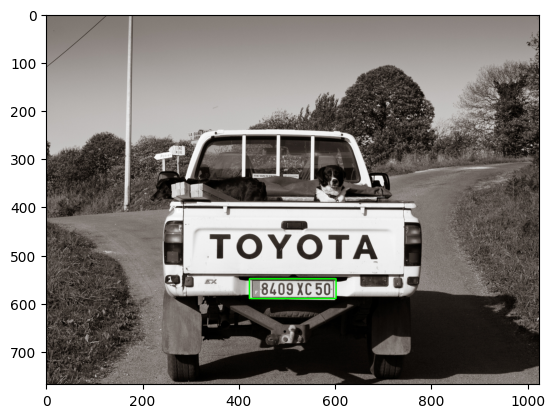

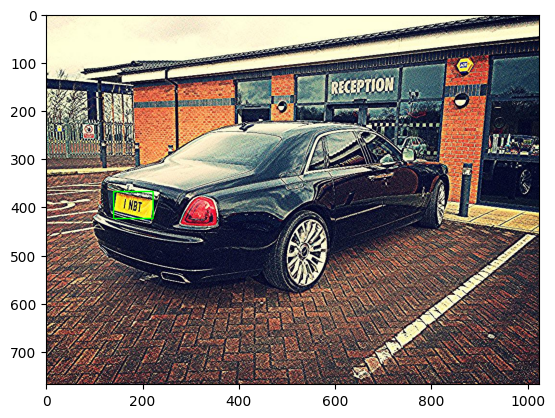

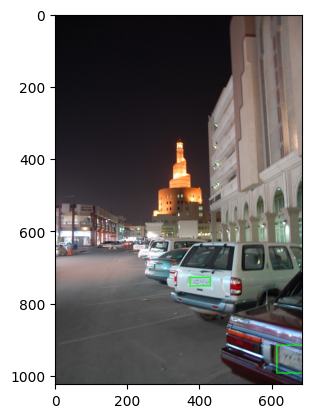

In [2]:
show_random_images(
    images_dir=Path("./data/images/train"),
    labels_dir=Path("./data/labels/train"),
)

#  <font style="color:green">2. Training [25 Points]</font> 

- **Write your training code in this section.**

- **You also have to share ([shared logs example](https://tensorboard.dev/experiment/JRtnsKbwTaq1ow6nPLPGeg)) the loss plot of your training using tensorboard.dev.** 

How to share TensorBoard logs using tensorboard.dev find [here](https://courses.opencv.org/courses/course-v1:OpenCV+OpenCV-106+2019_T1/courseware/b1c43ffe765246658e537109e188addb/d62572ec8bd344db9aeae81235ede618/4?activate_block_id=block-v1%3AOpenCV%2BOpenCV-106%2B2019_T1%2Btype%40vertical%2Bblock%40398b46ddcd5c465fa52cb4d572ba3229).

## <font color='red'>Tensorboard logs:</font>

Due to shut down of `https://tensorboard.dev` I have shared the logs using my github yo can find logs file [here](https://github.com/kamalfarahani/opencv_object_detection_project3/blob/main/runs/detect/train/events.out.tfevents.1725279566.max.53624.0).

project github link: [Github](https://github.com/kamalfarahani/opencv_object_detection_project3)

In [3]:
from pathlib import Path

from ultralytics import YOLO


def train_yolo(
    config_path: Path,
    epochs: int = 50,
    batch_size: int = 16,
) -> YOLO:
    model = YOLO("yolov8n.pt")

    model.train(
        data=str(config_path),
        epochs=epochs,
        batch=batch_size,
    )

    return model

In [4]:
model = train_yolo(config_path=Path("./config.yml"), epochs=30)

New https://pypi.org/project/ultralytics/8.2.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.82 🚀 Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning /home/kamal/projects/deep_learning_with_pytorch/week10/data/labels/train.cache... 5308 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5308/5308 [00:00<?,
val: Scanning /home/kamal/projects/deep_learning_with_pytorch/week10/data/labels/validation.cache... 385 images, 0 backgrounds, 0 corrupt: 100%|██████████| 385/385 [00:00<?,


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.28G      1.556      2.159      1.193         30        640: 100%|██████████| 332/332 [00:47<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.96it/s]

                   all        385        511      0.779       0.69      0.731      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.26G      1.637      1.362      1.215         29        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.08it/s]

                   all        385        511      0.871      0.729      0.791      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.25G      1.638      1.248       1.23         29        640: 100%|██████████| 332/332 [00:44<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.98it/s]

                   all        385        511      0.805      0.661      0.733       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.26G      1.618       1.18      1.227         29        640: 100%|██████████| 332/332 [00:44<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.00it/s]

                   all        385        511      0.842      0.728      0.772      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.26G      1.558      1.089        1.2         31        640: 100%|██████████| 332/332 [00:44<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.12it/s]

                   all        385        511      0.851      0.722      0.817       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.24G      1.533      1.047      1.171         38        640: 100%|██████████| 332/332 [00:44<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.11it/s]

                   all        385        511      0.877      0.746      0.826      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.26G      1.514     0.9907      1.161         24        640: 100%|██████████| 332/332 [00:44<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.03it/s]

                   all        385        511      0.904       0.79      0.861      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.26G      1.486     0.9653      1.146         22        640: 100%|██████████| 332/332 [00:45<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.02it/s]

                   all        385        511      0.899      0.789       0.87      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.24G      1.462     0.9374      1.137         22        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.94it/s]

                   all        385        511       0.88      0.833      0.869      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.24G      1.467     0.9274      1.141         21        640: 100%|██████████| 332/332 [00:45<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.12it/s]

                   all        385        511       0.92      0.812      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.24G      1.442     0.8961      1.124         39        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.00it/s]

                   all        385        511      0.914       0.81      0.864      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.24G      1.424     0.8742      1.116         34        640: 100%|██████████| 332/332 [00:45<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.01it/s]

                   all        385        511      0.912      0.811      0.863      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.26G      1.422     0.8654      1.118         28        640: 100%|██████████| 332/332 [00:45<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.04it/s]

                   all        385        511      0.928      0.838      0.888       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.26G      1.394     0.8336      1.102         29        640: 100%|██████████| 332/332 [00:45<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.04it/s]

                   all        385        511      0.946       0.82      0.903       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.24G      1.393     0.8365      1.105         21        640: 100%|██████████| 332/332 [00:45<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.52it/s]

                   all        385        511      0.936      0.832      0.905      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.24G      1.383     0.8111      1.101         30        640: 100%|██████████| 332/332 [00:45<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.12it/s]

                   all        385        511      0.942      0.832        0.9      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.26G      1.384     0.8008      1.091         32        640: 100%|██████████| 332/332 [00:45<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.09it/s]

                   all        385        511      0.936      0.854      0.896      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.26G      1.353      0.787      1.086         40        640: 100%|██████████| 332/332 [00:45<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.08it/s]

                   all        385        511      0.911      0.851      0.887      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.26G      1.358     0.7735      1.092         38        640: 100%|██████████| 332/332 [00:45<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.14it/s]

                   all        385        511      0.939      0.851      0.905      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.26G      1.349     0.7712       1.08         31        640: 100%|██████████| 332/332 [00:45<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.11it/s]

                   all        385        511      0.915      0.864      0.901      0.646


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.24G      1.375     0.7636      1.084         11        640: 100%|██████████| 332/332 [00:45<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.10it/s]

                   all        385        511      0.917       0.86      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.24G      1.368     0.7377      1.089         15        640: 100%|██████████| 332/332 [00:45<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.19it/s]

                   all        385        511      0.937      0.846      0.911      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.24G      1.351     0.7301      1.079         15        640: 100%|██████████| 332/332 [00:45<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.15it/s]

                   all        385        511      0.942      0.866       0.92       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.24G      1.345     0.7154      1.071         18        640: 100%|██████████| 332/332 [00:45<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.18it/s]

                   all        385        511      0.931      0.871      0.912      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.24G      1.334     0.7029      1.064         17        640: 100%|██████████| 332/332 [00:45<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.08it/s]

                   all        385        511      0.926       0.86       0.91       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.24G      1.314     0.6871      1.061         16        640: 100%|██████████| 332/332 [00:45<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.11it/s]

                   all        385        511      0.932      0.857      0.908      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.24G      1.302     0.6711      1.058         16        640: 100%|██████████| 332/332 [00:45<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.15it/s]

                   all        385        511      0.921      0.879       0.91      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.24G      1.292     0.6594      1.052         13        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.15it/s]

                   all        385        511      0.935      0.872      0.913      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.24G      1.287     0.6483      1.049         17        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.24it/s]

                   all        385        511      0.939      0.874      0.919      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.24G       1.27     0.6391      1.042         16        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.17it/s]

                   all        385        511      0.943      0.877       0.92      0.673



30 epochs completed in 0.395 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.74it/s]


                   all        385        511      0.943      0.877       0.92      0.673
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


#  <font style="color:green">3. Inference [15 Points]</font> 

**You have to make predictions from your trained model on three images from the validation dataset.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p3.png'>




In [5]:
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt


from pathlib import Path
from ultralytics import YOLO


def infer_random_images(
    model: YOLO,
    images_dir: Path,
    number_of_images=3,
) -> None:
    """
    Runs inference on random images and shows the results

    Args:
        images_dir (Path): Path to the images directory
        number_of_images (int, optional): Number of images to predict. Defaults to 3.

    Returns:
        None
    """
    random_images = random.sample(
        list(images_dir.glob("*.jpg")),
        number_of_images,
    )

    images = []
    for img_path in random_images:
        img = cv2.imread(str(img_path))
        results = model.predict(source=img_path)
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        images.append(img)

    for img in images:
        plt.imshow(img)
        plt.show()



image 1/1 /home/kamal/projects/deep_learning_with_pytorch/week10/data/images/validation/aac1aaaf824b63dd.jpg: 480x640 2 Vehicle registration plates, 48.2ms
Speed: 1.8ms preprocess, 48.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/kamal/projects/deep_learning_with_pytorch/week10/data/images/validation/f9170e8c13a99991.jpg: 544x640 1 Vehicle registration plate, 57.6ms
Speed: 2.7ms preprocess, 57.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /home/kamal/projects/deep_learning_with_pytorch/week10/data/images/validation/affd16c51644a893.jpg: 480x640 1 Vehicle registration plate, 6.4ms
Speed: 2.6ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


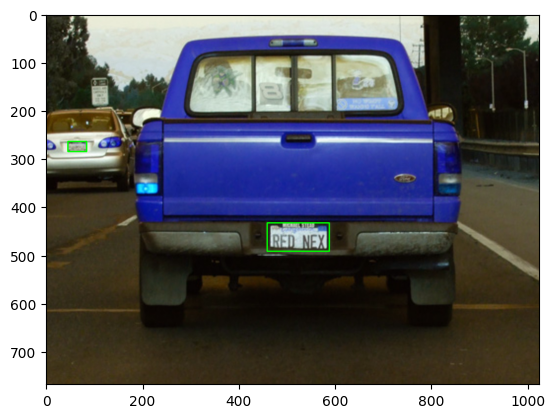

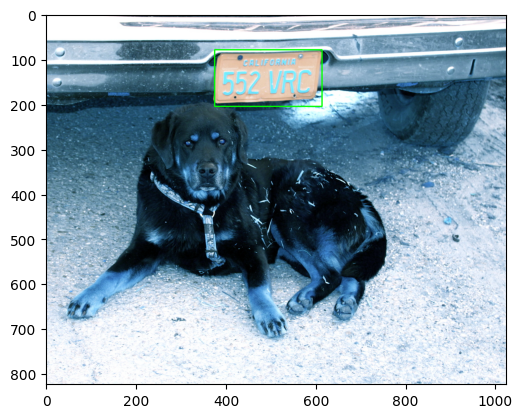

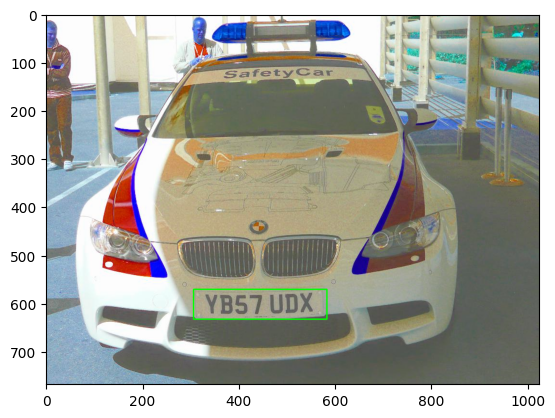

In [6]:
infer_random_images(model, Path('./data/images/validation'))

#  <font style="color:green">4. COCO Detection Evaluation [25 Points]</font> 

**You have to evaluate your detection model on COCO detection evaluation metric.**

For your reference here is the coco evaluation metric chart:


---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

#### <font style="color:red">The expected `AP` (primary challenge metric) is more than `0.5`.</font>

**The expected output should look similar to the following:**

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
```



In [7]:
results = model.val(save_json=True)

Ultralytics YOLOv8.2.82 🚀 Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)


val: Scanning /home/kamal/projects/deep_learning_with_pytorch/week10/data/labels/validation.cache... 385 images, 0 backgrounds, 0 corrupt: 100%|██████████| 385/385 [00:00<?,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.18it/s]


                   all        385        511      0.941      0.877      0.919      0.677
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Saving runs/detect/train2/predictions.json...
Results saved to runs/detect/train2


In [22]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load ground truth
coco_gt = COCO('./data/coco.json')

# Load predictions
coco_dt = coco_gt.loadRes('./runs/detect/train2/predictions.json')

# Initialize COCOeval
coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')  # Use 'bbox' for bounding box evaluation
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.666
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.912
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.787
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.347
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.731
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.797
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.735
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

# <font style="color:green">5. Run Inference on a Video [15 Points]</font>

#### [Download the Input Video](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1)

**You have to run inference on a video.** 

You can download the video from [here](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1).

#### <font style="color:red">Upload the output video on youtube and share the link. Do not upload the video in the lab.</font>

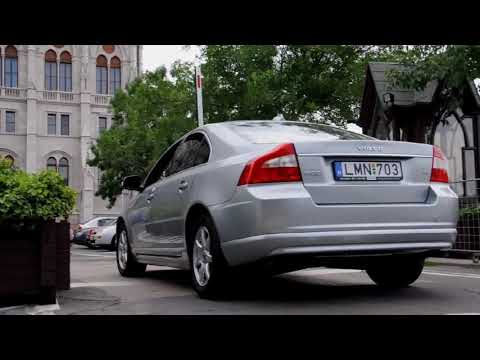

In [23]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("18HWHCevFdU", width=640, height=360)
display(video)

**Your output video should have a bounding box around the vehicle registration plate.**

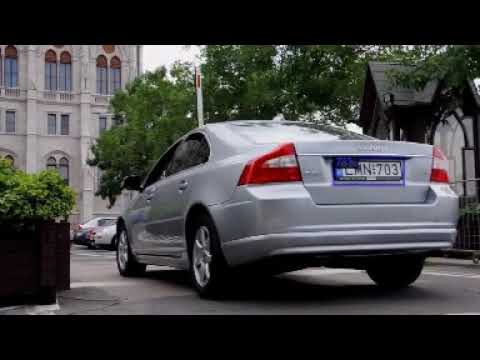

In [24]:
video = YouTubeVideo("5SgCuee7AMs", width=640, height=360)
display(video)

**You can use the following sample code to read and write a video.**

In [25]:
import os

def video_read_write(model, video_path):
    """
    Read video frames one-by-one, flip it, and write in the other video.
    video_path (str): path/to/video
    """
    video = cv2.VideoCapture(video_path)
    
    # Check if camera opened successfully
    if not video.isOpened(): 
        print("Error opening video file")
        return
    
    # create video writer
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_per_second = video.get(cv2.CAP_PROP_FPS)
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    output_fname = '{}_out.mp4'.format(os.path.splitext(video_path)[0])
    
    output_file = cv2.VideoWriter(
        filename=output_fname,
        # some installation of opencv may not support x264 (due to its license),
        # you can try other format (e.g. MPEG)
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"),
        fps=float(frames_per_second),
        frameSize=(width, height),
        isColor=True,
    )
    
        
    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            img = frame.copy()
            results = model.predict(source=img, verbose=False)
            for result in results:
                for box in result.boxes:
                    x1, y1, x2, y2 = box.xyxy[0]
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            output_file.write(img)
#             cv2.imwrite('anpd_out/frame_{}.png'.format(str(i).zfill(3)), frame[:, ::-1, :])
            i += 1
        else:
            break
        
    video.release()
    output_file.release()
    
    return

In [26]:
video_read_write(model, 'vid.mp4')